<a href="https://colab.research.google.com/github/kelvinfoo123/Machine-Learning-Projects/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import basic libraries and data**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
sales = pd.read_csv("Big Mart Sales.csv")
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
print(f'The dimension of the data is, {sales.shape}.')
print('')
print("Here are some information on the data")
print(sales.info())
print('')
print("Here are the number of null values in the data.")
print(sales.isna().sum())
print('')
print("Here are the number of duplicates in the data.")
print(sales.duplicated().sum())

The dimension of the data is, (8523, 12).

Here are some information on the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)

In [ ]:
# Determine if we should drop na in item_weight by looking at correlation between item weight and item sales 
sales.corr()
# We just exclude item weight column from the training and test data since there is very little correlation between item_weight and sales. 
# No need to drop na data in item_weight. 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


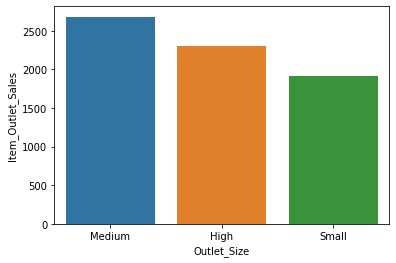

In [ ]:
# Determine if we should drop na in outlet_size by looking at relationship between outlet size and sales.

sns.barplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = sales, ci = None)

# There seems to be a relationship between outlet size and item sales. Hence, we exclude na data in outlet_size.

sales = sales.drop('Item_Weight', axis = 1)
sales.dropna(inplace = True)
sales.head()

In [ ]:
print(f'The dimension of the data is, {sales.shape}.')

The dimension of the data is, (6113, 11).


In [ ]:
print("Here is a summary of the dataset.")
print(sales.describe())

Here is a summary of the dataset.
       Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count      6113.000000  6113.000000                6113.000000   
mean          0.064505   141.256859                1995.794373   
std           0.050092    62.229701                   8.842615   
min           0.000000    31.290000                1985.000000   
25%           0.026681    94.012000                1987.000000   
50%           0.052811   143.178600                1997.000000   
75%           0.092834   185.892400                2004.000000   
max           0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        6113.000000  
mean         2322.688445  
std          1741.592093  
min            33.955800  
25%           974.731200  
50%          1928.156800  
75%          3271.075400  
max         13086.964800  


**Exploratory Data Analysis and Data Visualization**

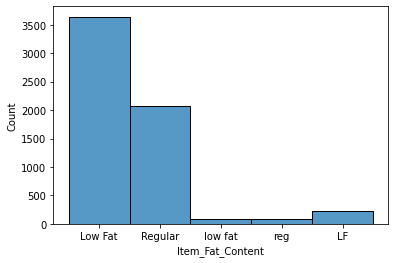

In [ ]:
# Distribution of fat content 
sns.histplot(x = 'Item_Fat_Content', data = sales)

# Replace low fat, LF with Low Fat and reg with Regular. 
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace('LF', 'Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace('reg', 'Regular')

In [ ]:
sales['Item_Fat_Content'].value_counts()

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64

There is not much difference in average sales for the different fat content. It shows that they can sell equally well. Hence, the company can bring in more items with regular fat content.


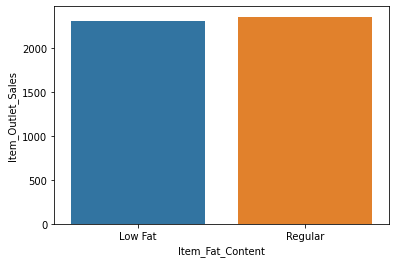

In [ ]:
# Relationship between fat content and sales 
sns.barplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = sales, ci = None)
print('There is not much difference in average sales for the different fat content. It shows that they can sell equally well. Hence, the company can bring in more items with regular fat content.')

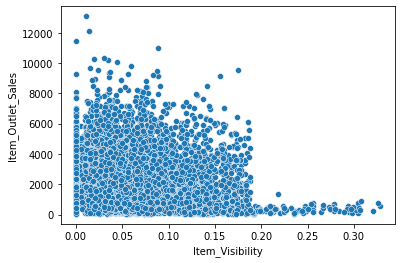

In [ ]:
# Relationship between item visibility and sales 
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = sales)

# Item visibility is defined as the % of total display area of all products in a store allocated to the particular product. 
# There is a negative correlation between the two features. 

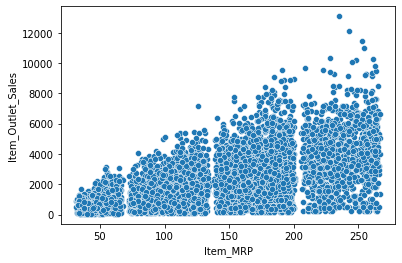

In [ ]:
# Relationship between market retail price and outlet sales
sns.scatterplot(x = 'Item_MRP', y= 'Item_Outlet_Sales', data = sales)

# Strong positive linear trend. As market retail price increases, sales increases.

In [ ]:
# Distribution of item types 
sales['Item_Type'].value_counts()

Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

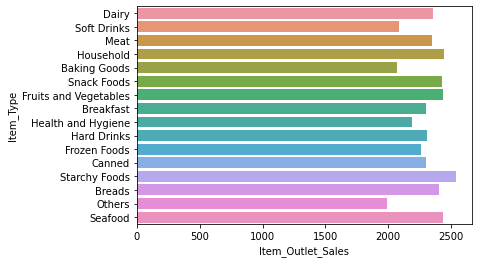

In [ ]:
# Relationship between item type and sales 
sns.barplot(y = 'Item_Type', x = 'Item_Outlet_Sales', data = sales, ci = None)

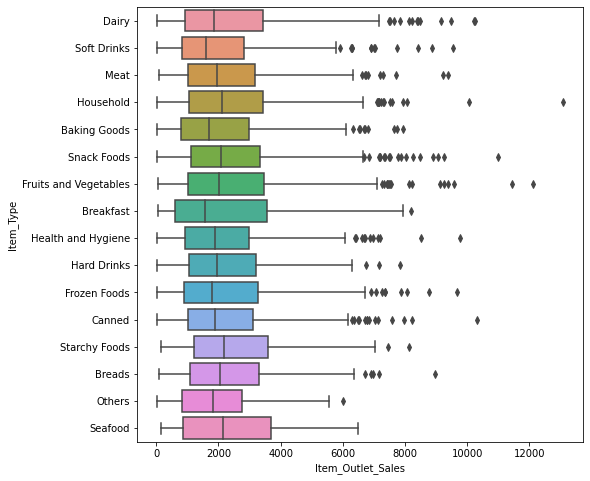

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(y = 'Item_Type', x = 'Item_Outlet_Sales', data = sales)

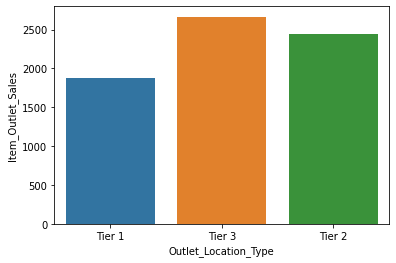

In [ ]:
# Relationship between outlet location and sales 
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = sales, ci = None)

# Tier 3 has the largest sales. Tier 1 has the least. 

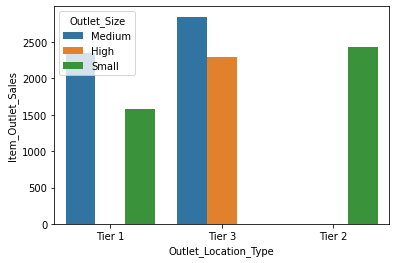

In [ ]:
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Size', data = sales, ci = None)

In [ ]:
sns.barplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', data = sales, ci = None)

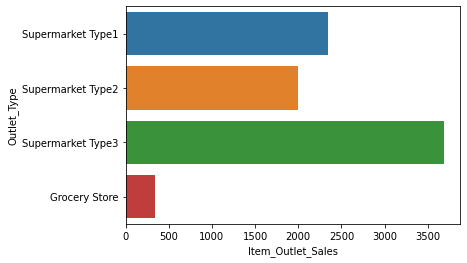

In [ ]:
# Relationship between outlet type and sales 
sns.barplot(y = 'Outlet_Type', x = 'Item_Outlet_Sales', data = sales, ci = None)

**Data Preparation**

In [61]:
sales = sales.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1)

X = sales.drop(['Item_Outlet_Sales'], axis = 1)
y = sales['Item_Outlet_Sales']

X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
4,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1
5,Regular,0.000000,Baking Goods,51.4008,Medium,Tier 3,Supermarket Type2


In [62]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
4     994.7052
5     556.6088
Name: Item_Outlet_Sales, dtype: float64

In [64]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
X['Item_Fat_Content'] = encoder.fit_transform(X['Item_Fat_Content'])
X['Item_Type'] = encoder.fit_transform(X['Item_Type'])
X['Outlet_Size'] = encoder.fit_transform(X['Outlet_Size'])
X['Outlet_Location_Type'] = encoder.fit_transform(X['Outlet_Location_Type'])
X['Outlet_Type'] = encoder.fit_transform(X['Outlet_Type'])

X.head(10)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0.016047,4,249.8092,1,0,1
1,1,0.019278,14,48.2692,1,2,2
2,0,0.016760,10,141.6180,1,0,1
4,0,0.000000,9,53.8614,0,2,1
5,1,0.000000,0,51.4008,1,2,2
6,1,0.012741,13,57.6588,0,2,1
7,0,0.127470,13,107.7622,1,2,3
10,0,0.000000,6,45.5402,1,0,1
11,1,0.045464,4,144.1102,2,0,1
12,1,0.100014,6,145.4786,1,0,1


In [66]:
# Scaling 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

**Building Model**

In [69]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score 
from sklearn.metrics import mean_squared_error 

In [70]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR(kernel = 'linear')
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
boost = XGBRegressor()

In [71]:
model = [lr, lasso, ridge, svr, tree, forest, boost]

final_score = []

def best_method(model, X, y, cv = 5):
  score = -cross_val_score(model, X, y, cv = cv, scoring = 'neg_mean_squared_error').mean()
  final = np.sqrt(score)
  final_score.append(final)

for i in model: 
  best_method(i,X,y)

pd.DataFrame(data = final_score, columns = ['mean_squared_error'], index = ['Linear Regression', 'Lasso', 'Ridge', 'SVR', 
                                                                            'Decision Tree', 'Random Forest', 'XGB Regressor'])

[06:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,mean_squared_error
Linear Regression,1239.570579
Lasso,1239.535407
Ridge,1239.561061
SVR,1648.202006
Decision Tree,1610.848715
Random Forest,1183.039123
XGB Regressor,1126.504251


XGB Regressor gave the least error. Hence, we tune the parameters of XGB to obtain a better result. 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
boost = XGBRegressor()

n_estimator = [100, 500, 900, 1100, 1300, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]

hyperparameter_grid = {'n_estimator': n_estimator, 'max_depth': max_depth, 'booster': booster, 
                       'learning_rate': learning_rate, 'min_child_weight' : min_child_weight}

random_cv = RandomizedSearchCV(estimator = boost, param_distributions = hyperparameter_grid, cv = 5, n_iter = 50, scoring = 'neg_mean_absolute_error', random_state = 42)

In [73]:
random_cv.fit(X_train, y_train)
boost_pred = random_cv.predict(X_test)

[07:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [75]:
print("Mean Squared Error in XGBoost",np.sqrt(mean_squared_error(y_test,boost_pred)))

Mean Squared Error in XGBoost 1079.7959141643573


In [77]:
print("The best parameters for XGBoost are")
random_cv.best_params_

The best parameters for XGBoost are


{'n_estimator': 1100,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'booster': 'gbtree'}